To install run

``pip install parallelplot``

In [1]:
"""
Parallel Plot Demo with Wine Quality Dataset

"""

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import parallelplot.plot as pp
from parallelplot.cmaps import purple_blue


In [2]:
# Function to download and load the wine quality dataset
def load_wine_quality_dataset():
    # URLs for the Wine Quality datasets 
    red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
    
    # Download and read the datasets
    red_wine = pd.read_csv(red_wine_url, sep=';')
    white_wine = pd.read_csv(white_wine_url, sep=';')
    
    # Add a wine type column
    red_wine['wine_type'] = 'red'
    white_wine['wine_type'] = 'white'
    
    # Combine the datasets
    wine_df = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
    
    return wine_df


wine_df = load_wine_quality_dataset()


In [3]:
print("Wine Quality Dataset:")
wine_df

Wine Quality Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type  
0         9.4        5       red  
1         9.8        5       red  
2         9.8        5       red  
3         9.8        6       red  
4         9.4        5       red  
...       ...      ...       ...  
6492     11.2        6     white  
6493      9.6        5     white  
6494      9.4        6     white  
6495     12.8        7     white  
6496     11.8        6     white  

[6497 rows x 13 columns]

3.000, 9.000


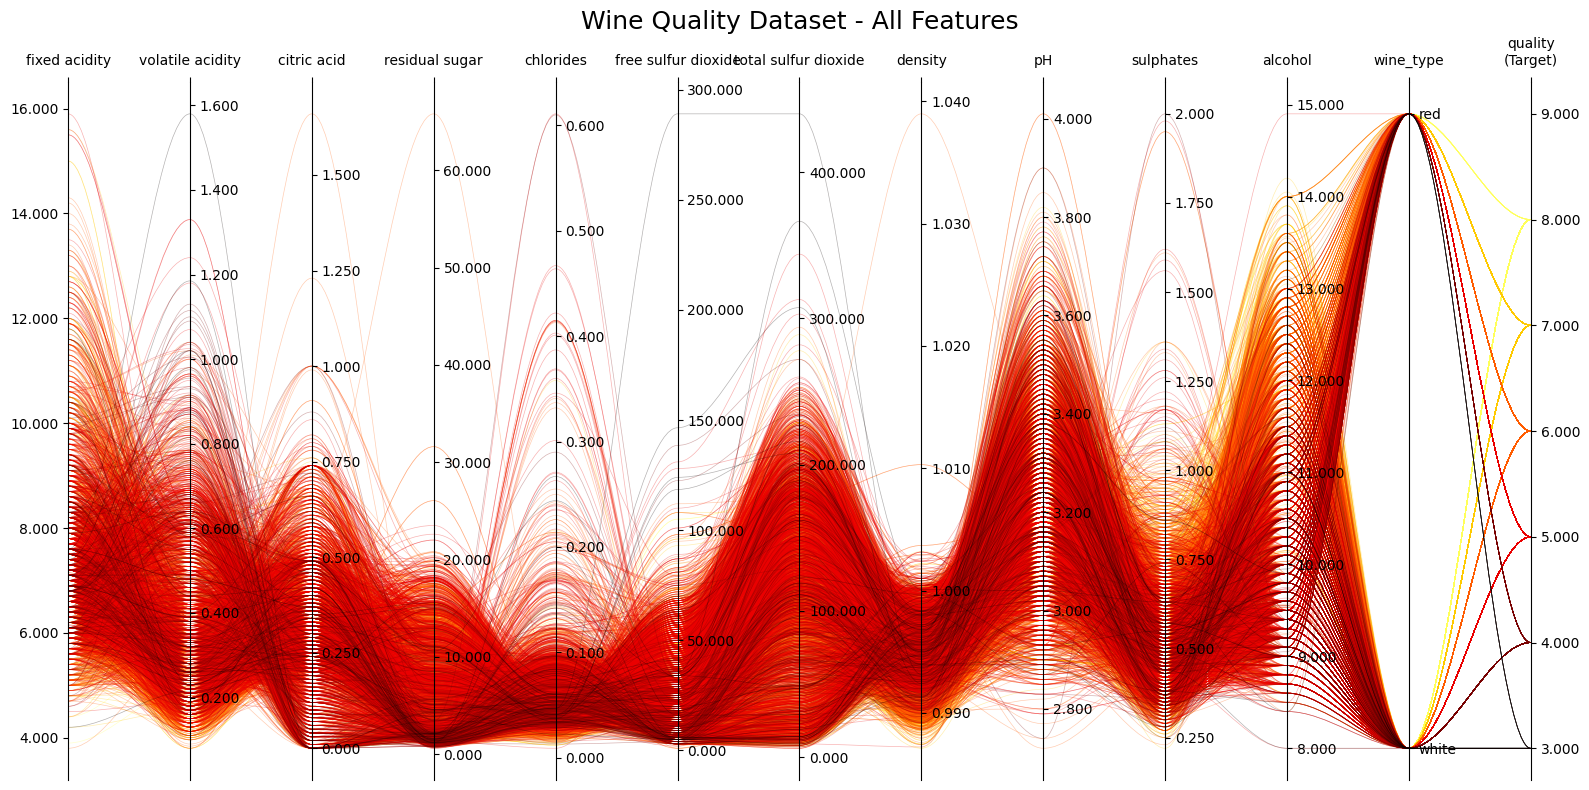

In [4]:
# Example 1: Basic parallel plot with default style
fig1, axes1 = pp.plot(
    df=wine_df,
    target_column='quality',
    title="Wine Quality Dataset - All Features",
    figsize=(16, 8),
    tick_label_size=10,
    alpha=0.3,
    cmap=cm.hot,
    order='max',
    lw=0.5,
    
)
plt.show()


3.000, 9.000


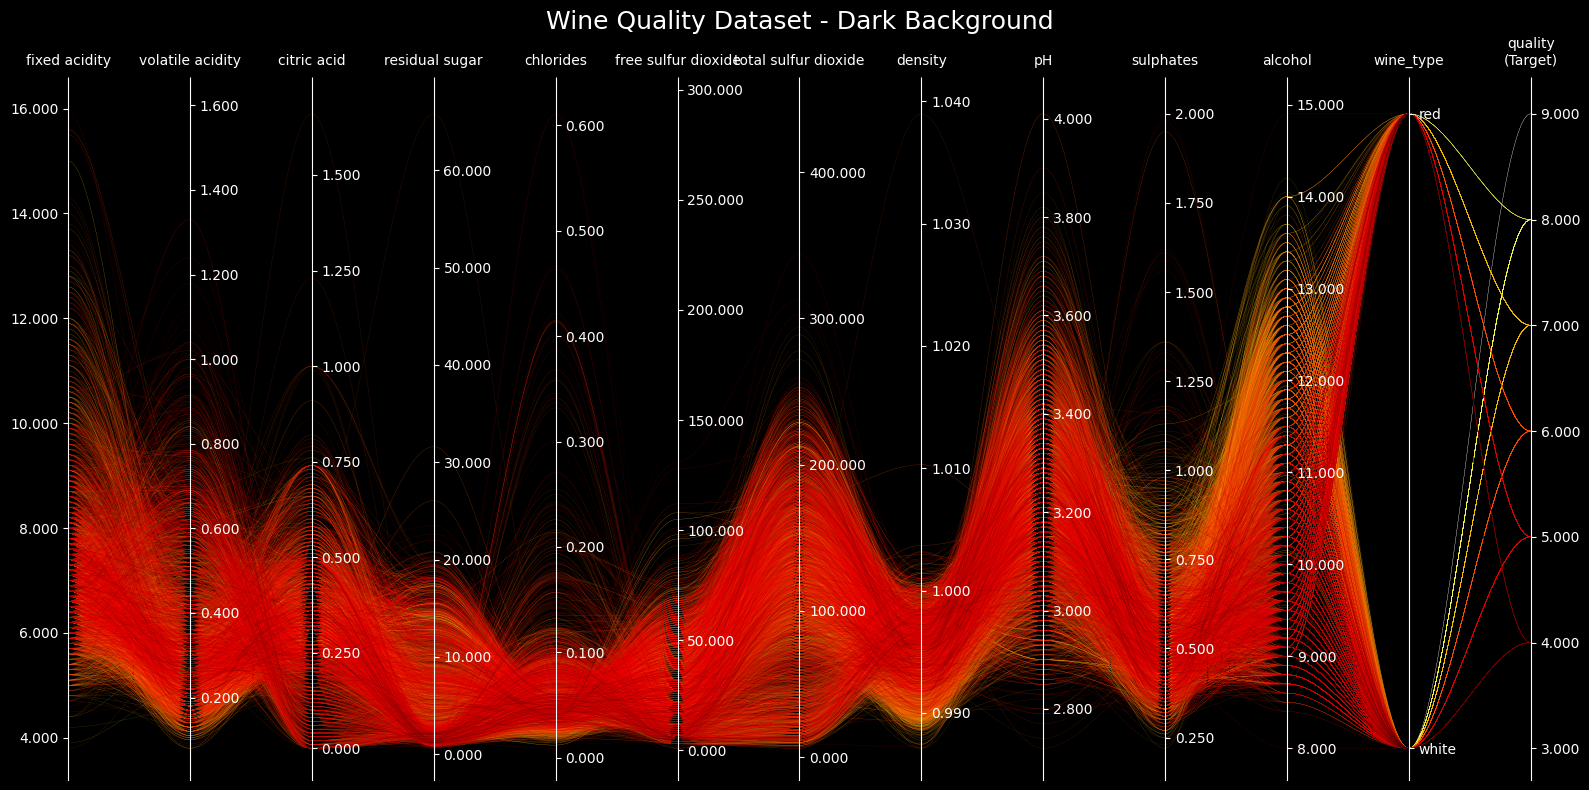

In [5]:
# Example 2: Parallel plot with dark background
fig2, axes2 = pp.plot(
    df=wine_df,
    target_column='quality',
    title="Wine Quality Dataset - Dark Background",
    figsize=(16, 8),
    style="dark_background",
    lw=0.2,
    # axes_to_reverse = [0, 1, 2, 5]
)
plt.show()

3.000, 9.000


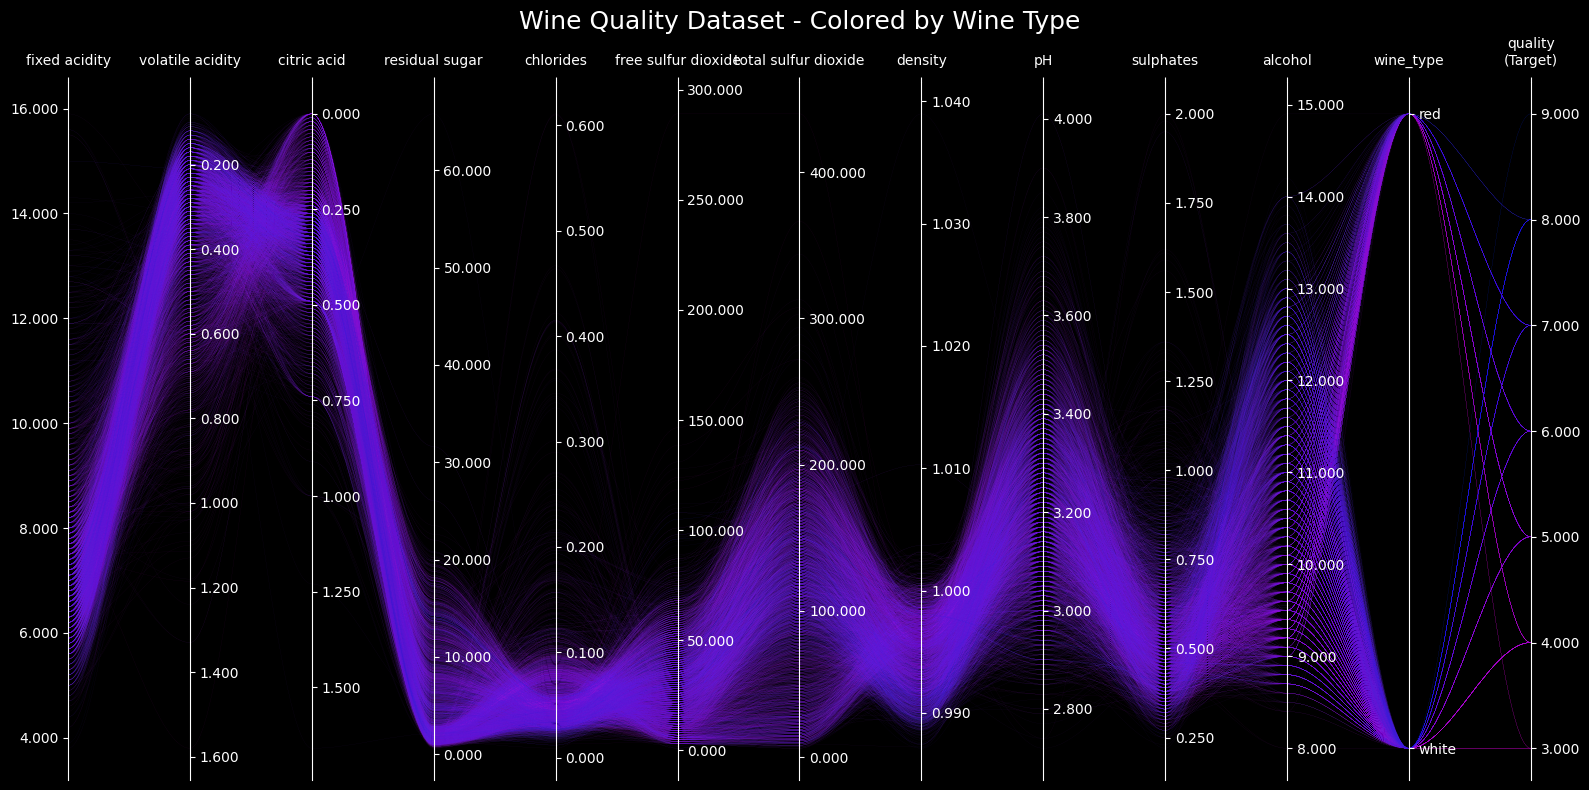

In [6]:
# Example 3: Different cmap 
fig3, axes3 = pp.plot(
    df=wine_df,
    target_column='quality',
    title="Wine Quality Dataset - Colored by Wine Type",
    figsize=(16, 8),
    cmap=purple_blue,
    style="dark_background",
    lw=0.1,
    order='min',
    alpha = 0.2,
    axes_to_reverse = [1,2]
)
plt.show()


3.000, 9.000


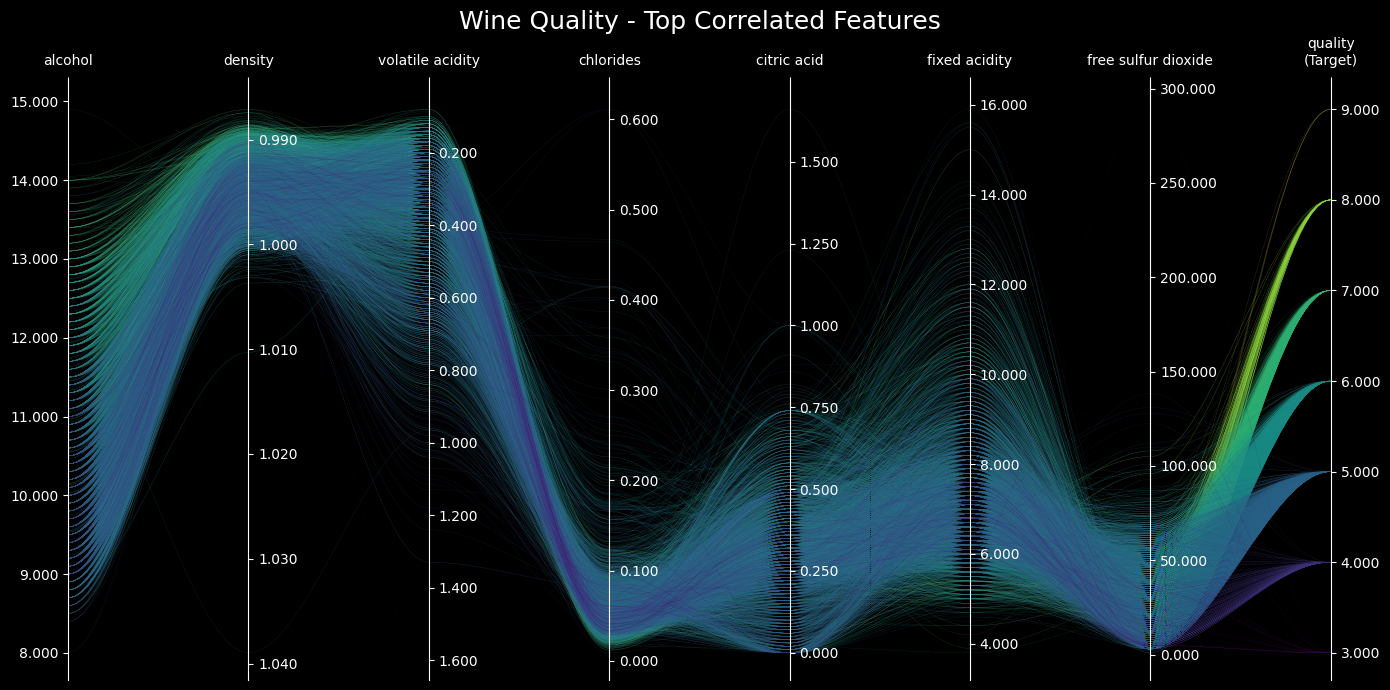

In [7]:
# Example 4: Select top features with highest correlation to quality
# Calculate correlations with quality
corr_with_quality = wine_df.drop(columns=['wine_type']).corr()['quality'].abs().sort_values(ascending=False)
top_features = corr_with_quality.index[:8]  # Top 8 features

# Create subset with only the top features
wine_top_features = wine_df[top_features]

fig4, axes4 = pp.plot(
    df=wine_top_features,
    target_column='quality',
    title="Wine Quality - Top Correlated Features",
    figsize=(14, 7),
    cmap=cm.viridis,
    style="dark_background",
    lw=0.2,
    axes_to_reverse = [1,2]


)
plt.show()


3.000, 9.000


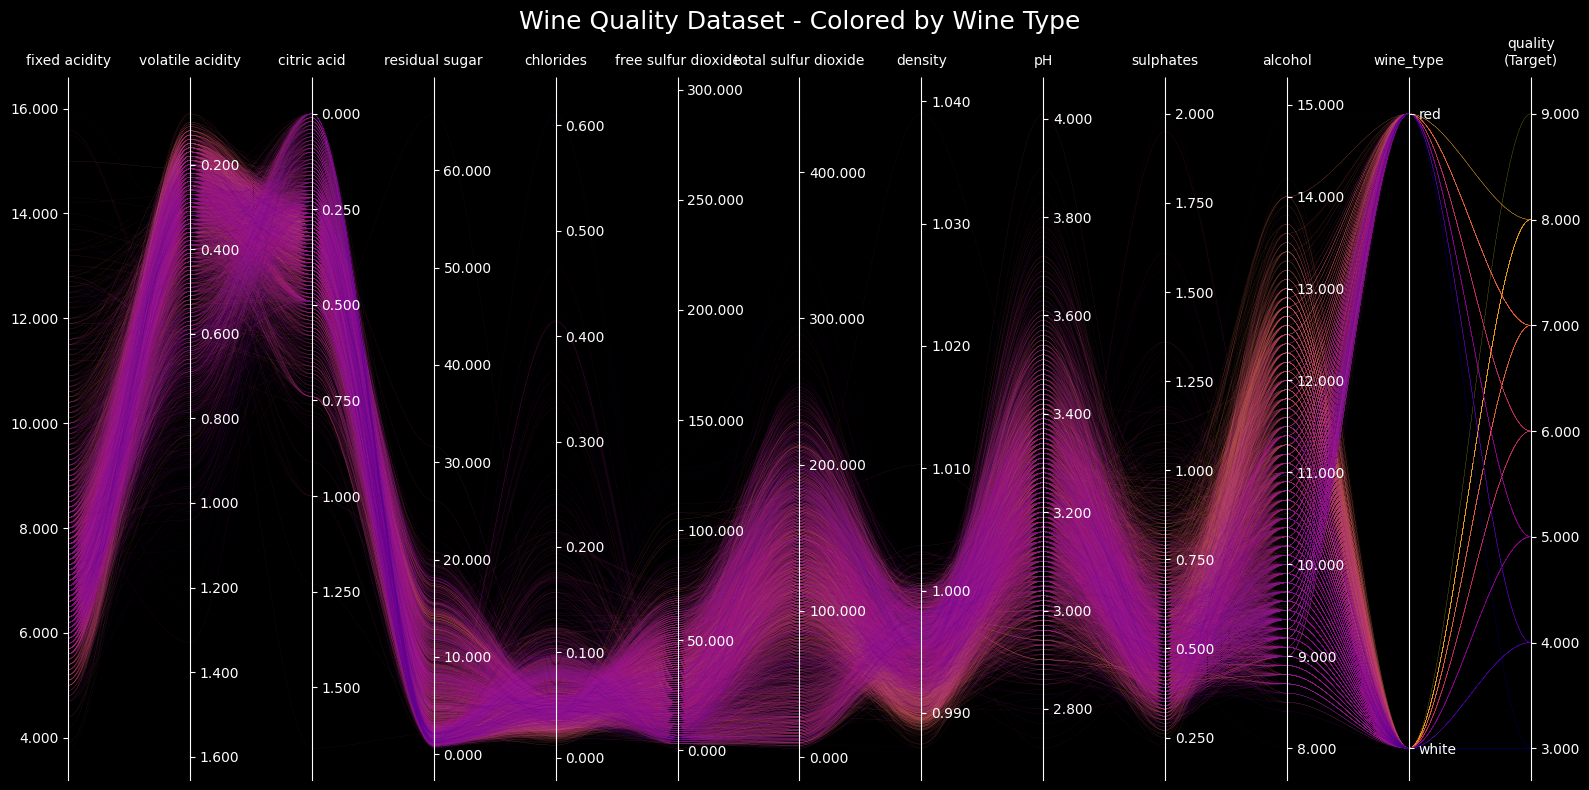

In [8]:
# Example 3: Different cmap 
fig3, axes3 = pp.plot(
    df=wine_df,
    target_column='quality',
    title="Wine Quality Dataset - Colored by Wine Type",
    figsize=(16, 8),
    cmap=cm.plasma,
    style="dark_background",
    lw=0.1,
    axes_to_reverse = [1,2]

)
plt.show()

3.000, 9.000


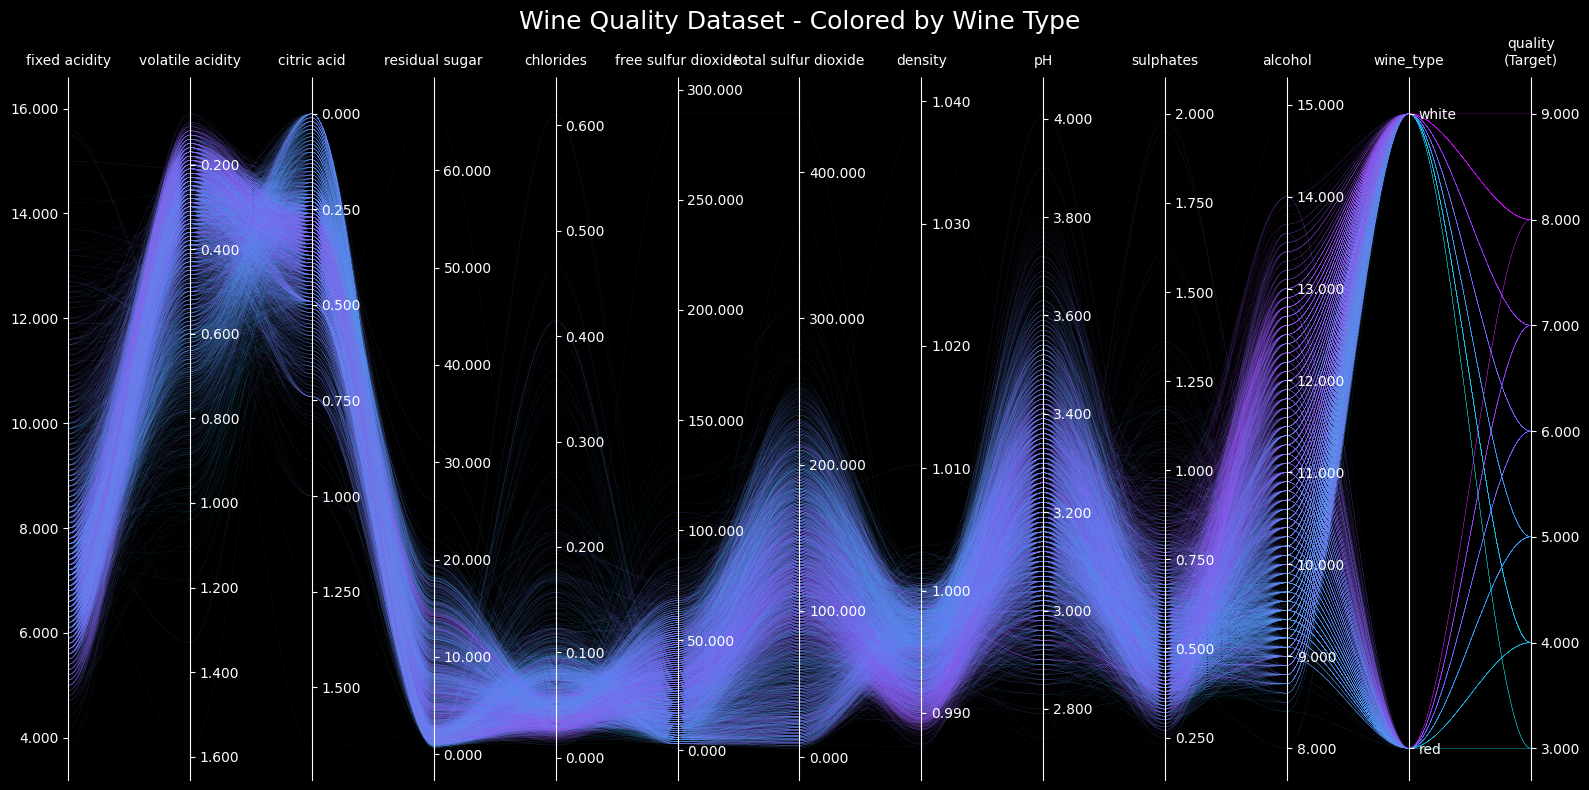

In [9]:
# Example 3: Different cmap 
fig3, axes3 = pp.plot(
    df=wine_df,
    target_column='quality',
    title="Wine Quality Dataset - Colored by Wine Type",
    figsize=(16, 8),
    cmap=cm.cool,
    style="dark_background",
    lw=0.1,
    order='random',
    axes_to_reverse = [1,2]

)
plt.show()